# Data Analysis - Celebrity Deaths in 2016

Source: [Wikipedia - Deaths in 2016](https://en.wikipedia.org/wiki/Deaths_in_2016)

#### Structure of dataset:
- File: "celebrity_deaths_2016.xlsx"
- Contains 2 sheets:
 - "celeb_death": contains records of deaths of famous humans and non-humans
 - "cause_of_death": contains the causes of the deaths (you'll need to merge it with the "celeb_death" sheet)

#### Other information about the dataset:
- The cause of death was not reported for all individuals
- The dataset might include deaths that took place in other years (you'll need to ignore these records)
- The dataset might contain duplicate records (you'll need to remove them)

#### The goals of the exercise:
- Load, merge, and clean the data
- Explore the data and answer some simple questions
- Run some basic analysis
- Visualize your results

In [5]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
import imp, os, sys
import importlib
sol = imp.load_compiled("sol", "./sol.py")
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal

In [6]:
"""
We're providing most of the import statements you need for the entire exercise
"""

import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

### Load, merge, and clean the data

In [7]:
""" 1.
1. Load the "celebrity_deaths_2016.xlsx" data file in the name "xl". (This file is saved in the same directory as this notebook.)
2. Print the sheet names
"""

# YOUR CODE HERE  (pass)

xl = pd.ExcelFile("celebrity_deaths_2016.xlsx")
df = pd.DataFrame(xl.parse("celeb_death"))
df

,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0
...,...,...,...,...,...
6589,2015-05-14,BB King,89,Singer,10648.0
6590,2015-06-07,Christopher Lee,93,Actor,10648.0
6591,2015-07-31,Roddy Piper,61,Pro Wrestler,9047.0
6592,2015-09-22,Yogi Berra,90,Baseball Player,12202.0


In [8]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(xl.sheet_names, sol.xl.sheet_names)

In [9]:
""" 2.
1. Read the "celeb_death" sheet into a dataframe named "df"
2. Take a look at the top 5 rows. Save it in a variable called 'top5', then print it
"""
# YOUR CODE HERE  (pass)
top5 = df.head(5)
#print(top5)


In [10]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(top5, sol.top5)

In [11]:
""" 3.
1. Take a look at the data types stored in each column in df. Store these in a variable called 'df_dtypes'
2. Get the shape of df. Store this in a variable called 'df_shape'
3. Print these
"""
# YOUR CODE HERE (pass)
df_dtypes=top5.dtypes
df_shape = df.shape

In [12]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df_dtypes, sol.df_dtypes)
assert_equal(df_shape, sol.df_shape)

In [13]:
""" 4.
Drop the duplicates (based on all columns) from df
"""
# YOUR CODE HERE (pass)
df = df.drop_duplicates()

In [14]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(df, sol.df2)

In [15]:
""" 5.
1. Read the "cause_of_death" sheet into a DataFrame named "cause_of_death"
2. Take a look at the top 5 rows. Store this in a variable named cause_top5, then print it
"""
# YOUR CODE HERE

# YOUR CODE HERE (pass)
cause_of_death = pd.read_excel(xl, 'cause_of_death')
cause_top5 = cause_of_death.head(5)
print(cause_top5)
 


   cause_id cause of death
0       753            ALS
1      1039           bomb
2      1120           shot
3      1499           fall
4      1629           shot


In [16]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(cause_top5, sol.cause_top5)

In [17]:
""" 6.
Drop the duplicates (based on the "cause_id" column) from the cause_of_death DataFrame

Hint: There is a single DataFrame method that does this
Use the "subset" argument to specify the "cause_id" column

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
"""
# YOUR CODE HERE (pass)
cause_of_death = cause_of_death.drop_duplicates(subset='cause_id', keep='first')



In [18]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(cause_of_death, sol.cause_of_death)

In [19]:
""" 7.
1. Merge the cause_of_death DataFrame with the df DataFrame and name the new DataFrame as "df"
2. Take a look at the top 5 rows in df. Save these in a variable called df_top5, then print it

Note: There are records in df (left DataFrame) that do not have a matching record in cause_of_death (right DataFrame)
We want to see ALL records in df despite the missing matches in cause_of_death, so you DON'T want to use an "inner join"
"""
# YOUR CODE HERE  (pass)
df = pd.merge(df, cause_of_death, how = 'left', on='cause_id') 
df_top5 = df.head() 
df_top5




,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure


In [20]:
##########################
### TEST YOUR SOLUTION ###
##########################
assert_frame_equal(df_top5, sol.df_top5)

In [21]:
sol.df_top5

,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure


### Querying data

For the following questions, all the operations are on the Dataframe df.

In [22]:
""" 8.
We'll be doing some calculations with the age column, but it was loaded from the data file as dtype "object"
So first, we need to cast DataFrame df to a numeric value
"""
# YOUR CODE HERE (pass)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [23]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['age'], sol.df3['age'])

In [24]:
""" 9.
What was the average age of death? Store this value in a variable called 'avg_age', then print it
"""
# YOUR CODE HERE    (passed! must be 77.03194103194103)


avg_age = df["age"].mean()

print(avg_age)
 

77.03194103194103


In [25]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(avg_age, sol.avg_age)

In [26]:
""" 10.
How many people died after the age of 70?
-- Store the result count in a variable named "count" and print it
"""
# YOUR CODE HERE (pass)

count = 0

for i in range(0,len(df)):
    if(df['age'][i] > 70):
        count+=1

print(count)

4752


In [27]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(count, sol.count)

In [28]:
""" 11.
Who died the youngest and what was the cause of death?
-- Store the name in a variable named "youngest_name" and print it
-- Store the cause in a variable named "youngest_cause" and print it

Hint: Get the min age and find the record that has that value
"""
# YOUR CODE HERE (pass)

youngest_name = df['name'][df[['age']].idxmin()]

youngest_cause = df['cause of death'][df[['age']].idxmin()]

print(youngest_name)
print(youngest_cause) 


5610    Vautour
Name: name, dtype: object
5610     euthanised
Name: cause of death, dtype: object


In [29]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(youngest_name, sol.youngest_name)
assert_series_equal(youngest_cause, sol.youngest_cause)

In [30]:
""" 12.
We'll be running some queries based on the "bio" column, 
but it was loaded from the data file as an object.  So first, cast this column to a string.
"""
# YOUR CODE HERE (pass)
df['bio'] = df['bio'].astype('str')
df['cause of death'] = df['cause of death'].astype('str')

In [31]:
print(df.dtypes)

date of death     datetime64[ns]
name                      object
age                      float64
bio                       object
cause_id                 float64
cause of death            object
dtype: object


In [32]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['bio'], sol.df['bio'])

In [33]:
""" 13.
How many American celebrities died?
-- Store the result count in a variable named "count_american" and print it

Hint: Search the bio for "American"
"""
# YOUR CODE HERE        (pass)
count_american = df['bio'].str.contains('American').sum()

In [34]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(count_american, sol.count_american)

In [35]:
""" 14.
What was one known cause of death for celebrities who died at age 50?
-- Name the result as "rand_cause"
-- Print the result using "print("Age 50. Cause of Death:", rand_cause)"

Hint: 
Get all the celebrity death records for celebrities who died at 50  
Ignore the ones where the cause of death is unknown, or NaN
import random and randomly select one of the death records 
Extract the cause of death and store in a variable "rand_cause"
"""

#############################################################################################
### DO NOT MODIFY THIS! WE NEED TO SEED THE RANDOM VALUE TO ACCURATELY TEST YOUR SOLUTION ###
import random
random.seed(0)
#############################################################################################

rand_cause = random.choice(list(df[df["age"] == 50]["cause of death"]))    #(pass)
print("Age 50. Cause of Death:", rand_cause)



Age 50. Cause of Death:  traffic collision


In [36]:
##########################
### TEST YOUR SOLUTION ###
##########################

from nose.tools import assert_in
assert_in(rand_cause, sol.possible_causes.values)

In [69]:
""" 15.
What was the mean age for each cause of death?

Hint: import numpy and group by 'cause of death', then get the mean age and store the 
resulting DataFrame in a variable named 'df_grouped_cause', then print it
"""
# YOUR CODE HERE
from numpy import *
df_grouped_cause = df.groupby("cause of death").agg({"age":['mean']},axis=0)

#pd.pivot_table(df, index="cause of death", values="age",aggfunc="mean")
#df_per_month = df.pivot_table(index= 'year',columns='month of death', aggfunc = 'size')




df_grouped_cause






,age
,mean
cause of death,
Alzheimer's disease,79.590909
Myself and I),76.000000
Parkinson's disease,80.200000
Parkinson's disease and multiple myeloma,69.000000
Pick's disease,68.000000
...,...
plane crash,55.500000
progressive supranuclear palsy,84.000000


In [60]:
##########################
### TEST YOUR SOLUTION ###
##########################
assert_frame_equal(df_grouped_cause, sol.df_grouped_cause)

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (334, 1)
[right]: (333, 1)

In [61]:
sol.df_grouped_cause

,mean
cause of death,
Alzheimer's disease,79.590909
Myself and I),76.000000
Parkinson's disease,80.200000
Parkinson's disease and multiple myeloma,69.000000
Pick's disease,68.000000
...,...
plane crash,55.500000
progressive supranuclear palsy,84.000000
shot,56.500000


### Count the number of people who died in each month of 2016
1. Create new columns that shows which month and year each person died in
2. Group all the entries based on the month they appeared in

In [39]:
""" 16.
Make a new column in the DataFrame df with the numeric month of death

Hint:
Use the apply() method to run a function against the "date of death" column,
and return the numeric month (get the value by using ".month")
"""


def get_month(date):                                     #(pass)
    m = pd.to_datetime(date)
    return m.month
df["month"] = df["date of death"].apply(get_month)

In [40]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['month'], sol.df['month'])

In [41]:
""" 17.
Make a new column in the DataFrame df with the year of death

Hint: Apply a function to get the year from the "date of death" column
""" #(pass)

df['year'] = df['date of death'].dt.year
df.head(5)
    

,date of death,name,age,bio,cause_id,cause of death,month,year
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016


In [42]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['year'], sol.df['year'])

In [43]:
""" 18.
There could be a small number of deaths that didn’t take place in 2016.  Just in case, 
filter out the deaths that didn’t take place in 2016.
-- Name the new DataFrame as “df_2016”
Hint: Query the df DataFrame for deaths where the “year” == 2016.
"""
import numpy as np
# YOUR CODE HERE
df_2016 = df[df['year'] == 2016]



df_2016

,date of death,name,age,bio,cause_id,cause of death,month,year
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016
...,...,...,...,...,...,...,...,...
6559,2016-12-31,Peter Fernando,77.0,"Indian Roman Catholic prelate, Bishop of Tutic...",NaN,nan,12,2016
6560,2016-12-31,Manjurul Islam Liton,48.0,Bangladeshi politician,NaN,nan,12,2016
6561,2016-12-31,David Meltzer,79.0,American poet and musician.,NaN,nan,12,2016
6562,2016-12-31,Prince Dimitri Romanov,90.0,"Russian prince, banker, philanthropist, and au...",NaN,nan,12,2016


In [44]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(df_2016, sol.df_2016)

AssertionError: DataFrame.iloc[:, 5] (column name="cause of death") are different

DataFrame.iloc[:, 5] (column name="cause of death") values are different (78.06216 %)
[index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
[left]:  [ brain cancer,  cancer,  cancer,  complications of a stroke,  heart failure,  lung cancer, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  cancer,  complications from a stroke,  complications from a stroke,  execution by beheading,  execution by beheading,  fall,  kidney failure,  pancreatic cancer,  pneumonia,  progressive supranuclear palsy,  shot, nan,  stabbed,  throat cancer, nan, nan, nan, nan, nan, nan, nan, nan, nan,  cancer,  pneumonia,  stroke,  suicide by gunshot, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  breast cancer,  heart attack,  heart attack,  heart failure,  heart failure,  prostate cancer,  respiratory failure,  suicide by jumping,  traffic collision, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  complications from surgery,  fall,  heart attack, nan, nan, nan, nan, nan, ...]
[right]: [ brain cancer,  cancer,  cancer,  complications of a stroke,  heart failure,  lung cancer, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  cancer,  complications from a stroke,  complications from a stroke,  execution by beheading,  execution by beheading,  fall,  kidney failure,  pancreatic cancer,  pneumonia,  progressive supranuclear palsy,  shot, nan,  stabbed,  throat cancer, nan, nan, nan, nan, nan, nan, nan, nan, nan,  cancer,  pneumonia,  stroke,  suicide by gunshot, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  breast cancer,  heart attack,  heart attack,  heart failure,  heart failure,  prostate cancer,  respiratory failure,  suicide by jumping,  traffic collision, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  complications from surgery,  fall,  heart attack, nan, nan, nan, nan, nan, ...]

In [45]:
sol.df_2016

,date of death,name,age,bio,cause_id,cause of death,month,year
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016
...,...,...,...,...,...,...,...,...
6559,2016-12-31,Peter Fernando,77.0,"Indian Roman Catholic prelate, Bishop of Tutic...",NaN,NaN,12,2016
6560,2016-12-31,Manjurul Islam Liton,48.0,Bangladeshi politician,NaN,NaN,12,2016
6561,2016-12-31,David Meltzer,79.0,American poet and musician.,NaN,NaN,12,2016
6562,2016-12-31,Prince Dimitri Romanov,90.0,"Russian prince, banker, philanthropist, and au...",NaN,NaN,12,2016


In [77]:
""" 19.
Using a pivot table, obtain a list that contains the number of people that died in each month
-- Use the new DataFrame "df_2016"
-- Name the result as "df_per_month"
"""
# YOUR CODE HERE
df_per_month['namelen'] = pd.pivot_table(df, index="month", values="name",aggfunc="count")

#df_per_month = df_2016.pivot_table(index="month",values="name", aggfunc="count")
df_per_month 

,namelen
month,
1,671
2,557
3,636
4,542
5,537
6,531
7,544
8,517
9,498


In [78]:
##########################
### TEST YOUR SOLUTION ###
##########################

df_sub = df_per_month
df_sol = sol.df_per_month

df_sub.columns = ['namelen']
df_sol.columns = ['namelen'] 

assert_frame_equal(df_sub, df_sol)


AssertionError: DataFrame.iloc[:, 0] (column name="namelen") are different

DataFrame.iloc[:, 0] (column name="namelen") values are different (66.66667 %)
[index]: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[left]:  [671, 557, 636, 542, 537, 531, 544, 517, 498, 511, 508, 522]
[right]: [669, 556, 636, 540, 536, 530, 543, 517, 497, 511, 507, 522]

In [48]:
df_sol

,namelen
month,
1,669
2,556
3,636
4,540
5,536
6,530
7,543
8,517
9,497


### Data Visualization

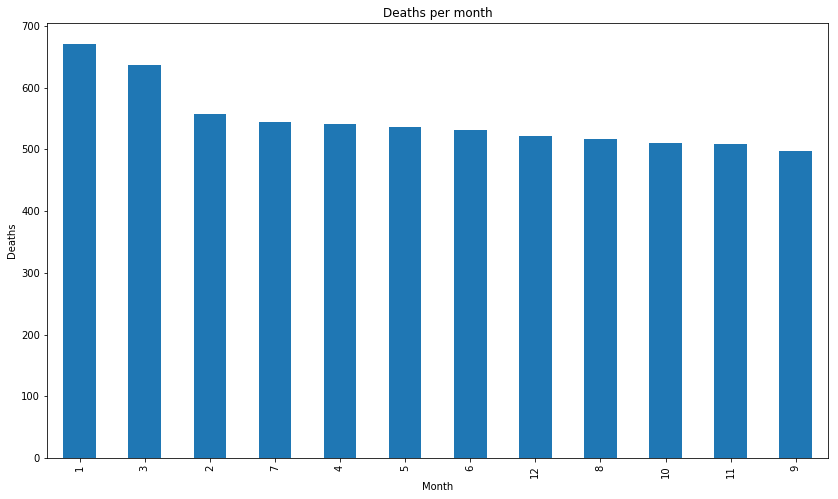

In [49]:
""" 20. 
Visualize the number of deaths per month as a bar chart

Hint: A DataFrame has a simple .plot() method you can use.  

The x axis should show the individual number of the month and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axes
"""

# YOUR CODE HERE
ax = df['month'].value_counts().plot(kind='bar',figsize=(14,8),title="Deaths per month") 
ax.set_xlabel("Month") 
ax.set_ylabel("Deaths")


###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

### Make a bar chart that plots the number of deaths per nationality
1. Create a new column that identifies the nationality of each celebrity, extracting the first word from the bio
2. Make a bar chart that plots the number of deaths per nationality

In [50]:
""" 21.
Create a new column in the DataFrame df that identifies the nationality of each celebrity, 
extracting the first word from the bio

Hint:
To get the nationality from the bio, use the method split() on the column "bio" 
and use the first element in the split result as the nationality.

For simplicity purposes, don't worry about nationalities containing more than 1 word.  For example, 
when getting the nationality from "bio", it's OK to get "New" for New Zealand or "Costa" for Costa Rican.
"""

def get_nationality(bio):   #(pass)
    return bio.split()[0]

df["nationality"] = df["bio"].apply(get_nationality)

In [51]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_series_equal(df['nationality'], sol.df['nationality'])

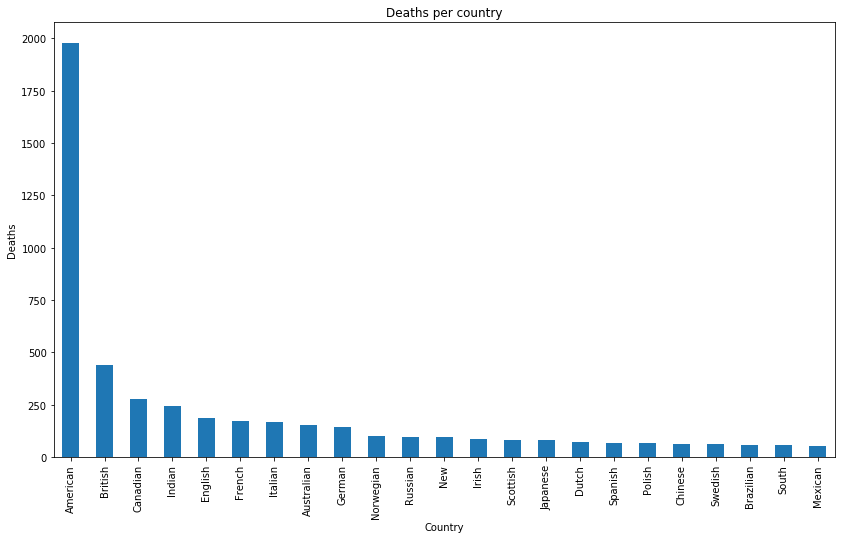

In [88]:
""" 22.
Make a bar chart that plots the number of deaths per nationality
Only include nationalities with more than 50 deaths
-- Name the resulting Series as "unlucky_countries"
Hint(s):
Get the count of unique values in the 'nationality' column using the value_counts() method.
Filter the resulting Series to only include those nationalities with a count of more than 50.
Plot the final Series.  Note, a Series has a simple .plot() method you can use.
The x axis should show the individual nationalities and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axis
"""
# YOUR CODE HERE
CountStatus = pd.value_counts(df['nationality'].values, sort=True)
unlucky_countries= CountStatus.loc[lambda x: x > 50] 
ax = unlucky_countries.plot(kind='bar',figsize=(14,8),title="Deaths per country")
ax.set_xlabel("Country") 
ax.set_ylabel("Deaths")


plt.plot()





###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [1]:

import pandas as pd     
import numpy as np
from matplotlib import pyplot as plt    

